In [27]:
import plotly.graph_objects as go
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
import csv
import pandas as pd
from pandas import DataFrame, Series  # for convenience

# Optionally, tweak styles.
mpl.rc('font', family='serif')
mpl.rc('figure',  figsize=(3.15,3.15), dpi=50)
mpl.rc('xtick', labelsize='small')
mpl.rc('ytick', labelsize='small')

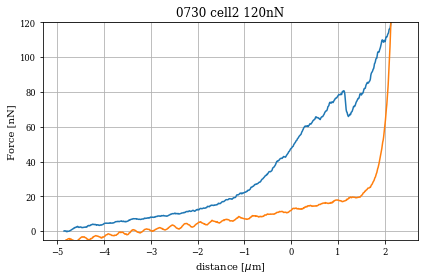

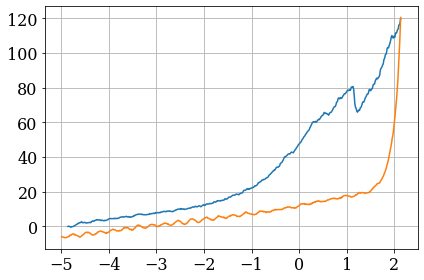

In [2]:
i=2
k_tot=['10nN','20nN','30nN','40nN','50nN','60nN','70nN']
k_tot2=['70nN','80nN', '90nN','100nN','110nN','130nN','120nN','140nN','160nN','170nN']
k_tot3=['120nN']
set_point='100-170nN'

for k in k_tot3:
    csvfile_fw=f'fd/20200730/movie_cell{i}_{set_point}/cell{i}_{k}_forward.csv'
    csvfile_bw=f'fd/20200730/movie_cell{i}_{set_point}/cell{i}_{k}_backward.csv'

    fd_osc_fw=pd.read_csv(csvfile_fw, header=None, delimiter=";").to_numpy()
    fd_osc_bw=pd.read_csv(csvfile_bw, header=None, delimiter=";").to_numpy()
    um_fw=fd_osc_fw[:,0]*1e6
    um_bw=fd_osc_bw[:,0]*1e6
    nN_fw=fd_osc_fw[:,1]*1e9
    nN_bw=fd_osc_bw[:,1]*1e9

    fig, ax = plt.subplots()
    ax.plot(um_fw,nN_fw, um_bw,nN_bw)
    ax.set(xlabel='distance [$\mu$m]', ylabel='Force [nN]')
    ax.grid()
    ax.set(title=f'0730 cell{i} {k}')
    ax.set(ylim=[-5,120], xlim=[-5.3,2.7])
    fig.tight_layout()
    plt.savefig(f'fd/20200730/movie_cell{i}_{set_point}/cell{i}_{k}_lim.png', dpi=600)

    fig, ax = plt.subplots()
    ax.plot(um_fw,nN_fw, um_bw,nN_bw)
    #ax.set(xlabel='distance [$\mu$m]', ylabel='Force [nN]')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.grid()
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(0)
    #ax.set(title=f'0730 cell{i} {k}')
    fig.tight_layout()
    plt.savefig(f'fd/20200730/movie_cell{i}_{set_point}/cell{i}_{k}.png', dpi=600)
   

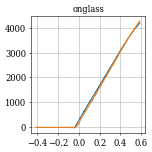

In [45]:
i=2
k='onglass'
r='14'

csvfile_fw=f'fd/{k}_forward.csv'
csvfile_bw=f'fd/{k}_backward.csv'

fd_osc_fw=pd.read_csv(csvfile_fw, header=None, delimiter=";").to_numpy()
fd_osc_bw=pd.read_csv(csvfile_bw, header=None, delimiter=";").to_numpy()
um_fw=fd_osc_fw[:,0]*1e6-4.2
um_bw=fd_osc_bw[:,0]*1e6-4.2
nN_fw=fd_osc_fw[:,1]*1e9
nN_bw=fd_osc_bw[:,1]*1e9

fig, ax = plt.subplots()
ax.plot(um_fw,nN_fw, um_bw,nN_bw)
#ax.set(xlabel='distance [$\mu$m]', ylabel='Force [nN]')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0)
ax.grid()
ax.set(title=f'{k}')
fig.tight_layout()
plt.savefig(f'fd/{k}.png', dpi=600)



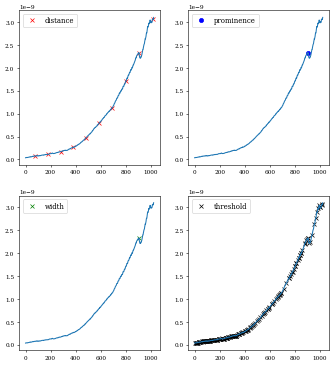

In [20]:
x=fd_osc_fw[:,1]
peaks, pr = find_peaks(x, distance=100)
peaks2, _ = find_peaks(x, prominence=0.00000000008)      # BEST!
peaks3, _ = find_peaks(x, width=10)
peaks4, _ = find_peaks(x, threshold=0)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, x[peaks3], "xg"); plt.plot(x); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, x[peaks4], "xk"); plt.plot(x); plt.legend(['threshold'])
plt.show()

In [22]:
x_peaks=x[peaks2]
j2=[i for i in x_peaks if i >=0]
j2

[2.33026e-09]

In [41]:
fd_osc_fw

array([['0,00E+00', '0.00000e+00', nan],
       ['0.00392157', '0.00000e+00', nan],
       ['0.00784314', '0.00000e+00', nan],
       ...,
       ['0.992157', '1,00E+00', nan],
       ['0.996078', '1,00E+00', nan],
       ['1,00E+00', '1,00E+00', nan]], dtype=object)